In [1]:
import pickle
from numpy import array

map_list = [array([[0, 1, 0, 0, 0, 0],
                    [0, 1, 1, 1, 1, 1],
                    [0, 1, 0, 0, 0, 0],
                    [0, 1, 5, 0, 2, 0],
                    [0, 1, 1, 1, 3, 1],
                    [0, 0, 0, 0, 4, 0]]),
            array([[0, 0, 4, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0],
                    [1, 3, 1, 1, 1, 0],
                    [0, 0, 0, 0, 1, 0],
                    [0, 2, 0, 0, 1, 0],
                    [0, 0, 0, 5, 3, 0]]),
            array([[0, 5, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 2],
                    [1, 1, 1, 3, 1, 1, 1, 0],
                    [0, 0, 0, 0, 0, 0, 1, 0],
                    [0, 0, 0, 0, 0, 4, 1, 0],
                    [0, 0, 0, 0, 0, 0, 3, 0],
                    [0, 0, 0, 0, 0, 0, 1, 0],
                    [0, 0, 0, 0, 0, 0, 1, 0]]),
            array([[0, 1, 0, 0, 0, 0, 0, 5],
                    [0, 1, 0, 0, 0, 0, 0, 0],
                    [0, 1, 0, 0, 0, 0, 0, 0],
                    [0, 1, 0, 0, 0, 0, 0, 0],
                    [0, 3, 0, 2, 0, 0, 0, 0],
                    [0, 1, 0, 0, 0, 0, 0, 0],
                    [0, 1, 1, 1, 1, 3, 1, 1],
                    [0, 0, 0, 0, 0, 0, 0, 4]]),
            array([[0, 0, 1, 0, 0, 0, 0, 0, 5, 0],
                    [0, 0, 1, 2, 0, 0, 0, 0, 0, 0],
                    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 1, 1, 3, 1, 1, 1, 1, 1],
                    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                    [4, 0, 1, 1, 1, 1, 3, 1, 1, 1],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
            array([[0, 0, 0, 0, 0, 0, 4, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [1, 1, 1, 3, 1, 1, 1, 1, 3, 1],
                    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                    [1, 1, 1, 1, 1, 3, 1, 0, 0, 0],
                    [0, 0, 2, 0, 0, 0, 1, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 3, 0, 0, 0],
                    [0, 5, 0, 0, 0, 0, 1, 0, 0, 0]])]


with open("doorkey_all_maps.pickle", 'wb') as handle:
        pickle.dump(map_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [1]:
import glob
import json
import glob
import numpy as np
import pandas as pd
import seaborn as sns
from natsort import natsorted
import matplotlib.pyplot as plt
from collections import defaultdict
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator


def load_csv(file_name):
    with open(file_name, "rt") as file_handler:
        data_frame = pd.read_csv(file_handler, index_col=None)

    data_frame = data_frame.rename(columns={'Unnamed: 0': 'index', 'Index, Eval': 'reward'})
    return data_frame


def tabulate_events(dpath, type="eval/mean_reward"):
    summary_iterators = [EventAccumulator(os.path.join(dpath, dname)).Reload() for dname in os.listdir(dpath)]

    tags = summary_iterators[0].Tags()['scalars']


    for it in summary_iterators:
        assert it.Tags()['scalars'] == tags

    out = defaultdict(list)
    steps = []

    for tag in tags:
        if tag == type:
            steps = [e.step for e in summary_iterators[0].Scalars(tag)]

            for events in zip(*[acc.Scalars(tag) for acc in summary_iterators]):
                assert len(set(e.step for e in events)) == 1

                out[tag].append([e.value for e in events])

    return out, steps


def to_csv(dpath = "2Ocak_PPOCNN_Bayes_8x8/tensorboard/target1/"):
    dirs = os.listdir(dpath)

    for dir in dirs:
        d, steps = tabulate_events(dpath + dir)
        tags, values = zip(*d.items())
        np_values = np.array(values)
        # stop

        for index, tag in enumerate(tags):
            df = pd.DataFrame(np_values[index], index=steps, columns=["Index, Eval"])
            df.to_csv(dpath + dir + ".csv")

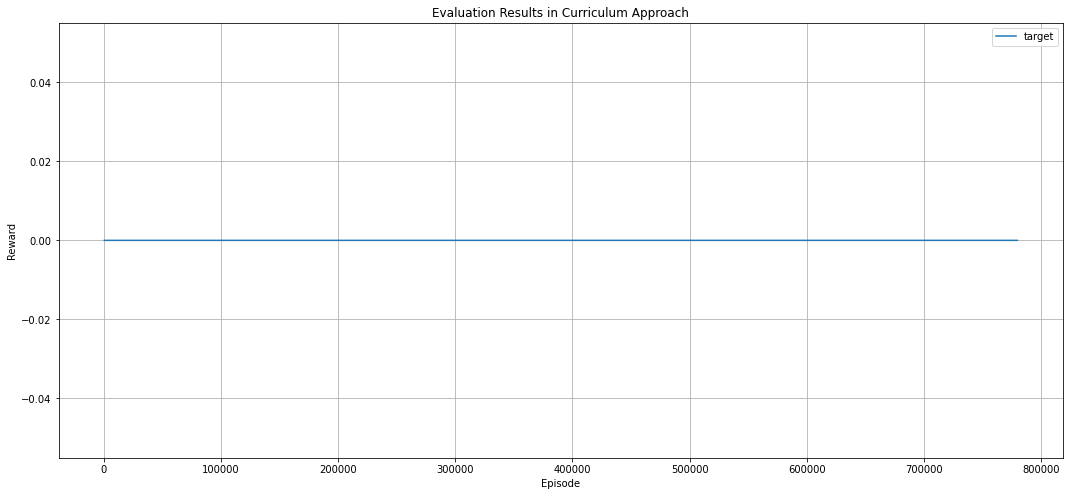

In [15]:
# folder = "2Ocak_PPOCNN_NoCurriculum"
# index = 1

# to_csv(dpath = folder + "/tensorboard/target" + str(index) + "/")

# fig = plt.figure(figsize=(18, 8))
# dir_list = glob.glob(folder + "/tensorboard/target" + str(index) + "/*.csv")
# dir_list = natsorted(dir_list)
# prev_ind = 0
# name_list = []
# for dir in dir_list:
#     name = dir.split("\\")[-1].split("target_" + str(index) + "_")[-1][:-4]
#     name_list.append(name)
#     pd_frame = load_csv(dir)
#     pd_frame['index'] += prev_ind
#     prev_ind = np.max(pd_frame['index'].values)
#     sns.lineplot(x='index', y='reward', data=pd_frame)


# plt.legend(labels=name_list)
# plt.title('Evaluation Results in Curriculum Approach')
# plt.xlabel('Episode')
# plt.ylabel('Reward')
# plt.grid()
# plt.savefig("NoCurriculum_target_" + str(index) +".png")

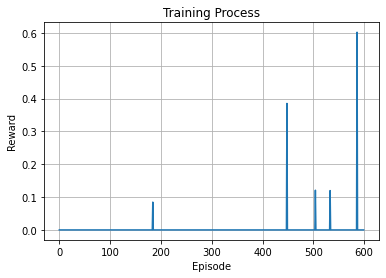

In [12]:
file_name = "experimentsMinigrid/torchbeast-20230119-132832/logs.csv"

with open(file_name, "rt") as file_handler:
        data_frame = pd.read_csv(file_handler)

# data_frame["mean_episode_return"]

# data_frame["# _tick"] = data_frame["# _tick"]*1000
sns.lineplot(x='# _tick', y='mean_episode_return', data=data_frame.iloc[:600])
# plt.legend(labels=name_list)
plt.title('Training Process')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.grid()
plt.savefig("Amigo.png")

In [4]:
np.max(data_frame.iloc[:600]["mean_episode_return"].values)

0.6021999716758728

In [9]:
(data_frame["_time"].values[600] - data_frame["_time"].values[0])

286.795889377594

In [8]:
data_frame

,# _tick,_time,frames,total_loss,mean_episode_return,pg_loss,baseline_loss,entropy_loss,gen_rewards,gg_loss,generator_entropy_loss,generator_baseline_loss,mean_intrinsic_rewards,mean_episode_steps,ex_reward,generator_current_target
0,0,1.674124e+09,0,6.786822,0.0,6.634575,0.248820,-0.096573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000,1.674124e+09,800,-37.198067,0.0,-38.657120,1.555616,-0.096562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,1.674124e+09,1600,40.441193,0.0,38.953014,1.584010,-0.095834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3000,1.674124e+09,2400,-18.157042,0.0,-18.399542,0.337505,-0.095005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4000,1.674124e+09,3200,117.408340,0.0,105.858330,11.645644,-0.095636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,835000,1.674125e+09,668000,3.136717,0.0,0.912222,2.268155,-0.043660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
836,836000,1.674125e+09,668800,-4.747008,0.0,-6.363104,1.659463,-0.043366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
837,837000,1.674125e+09,669600,7.319574,0.0,3.394990,3.967245,-0.042661,0.65,1.12611,-0.184223,0.084693,0.749556,150.78125,0.0,13.0
838,838000,1.674125e+09,670400,9.750544,0.0,6.226468,3.568759,-0.044682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
len(data_frame)

840